(101766, 50)
   encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No        

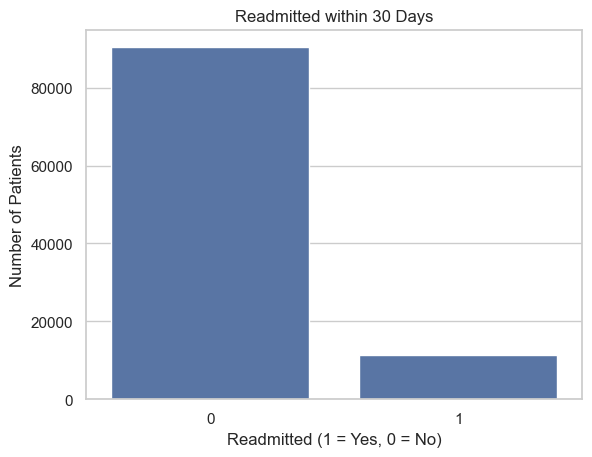

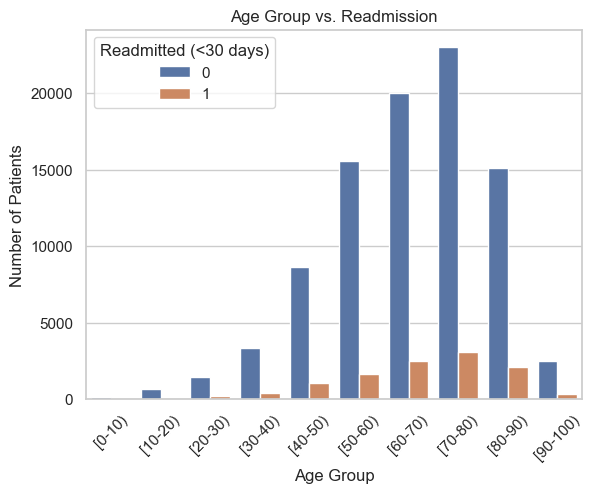

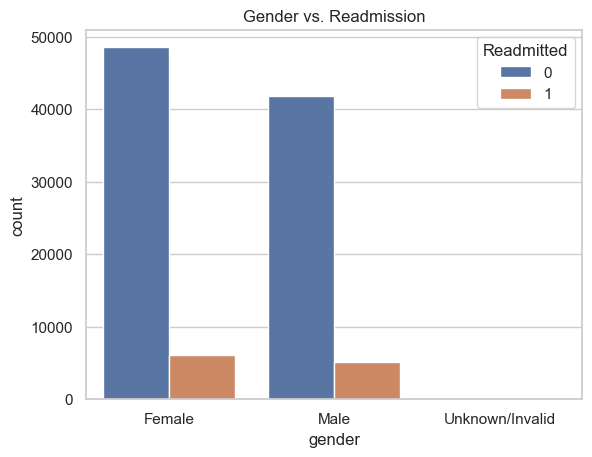

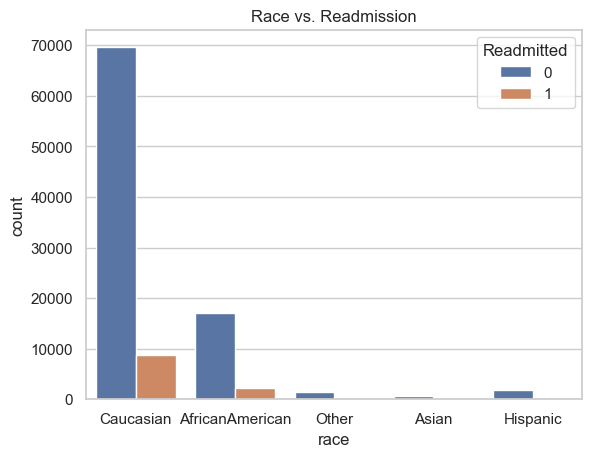

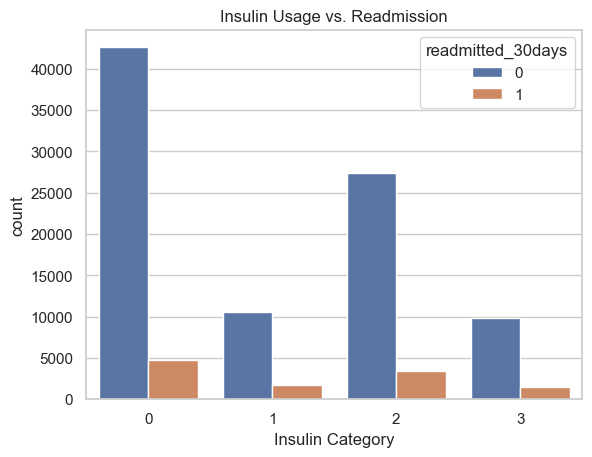

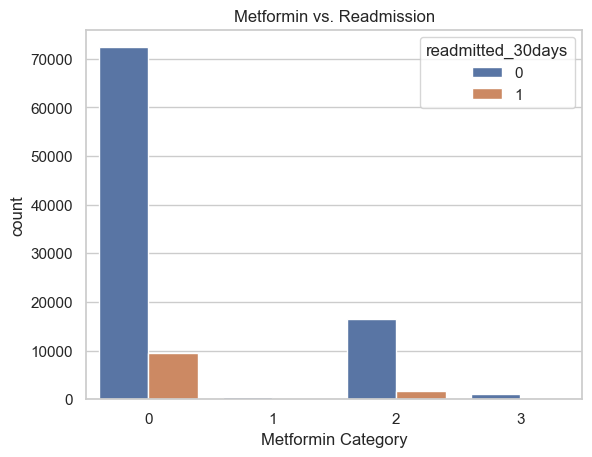

In [ ]:
import pandas as pd
import numpy as np

#.....importing data set....#

df=pd.read_csv("diabetic_data.csv")
print(df.shape)
print(df.head())
print(df.info())
print(df.describe())
print(df['readmitted'].value_counts())
df['readmitted_30days'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

#...data cleaning...#

df.replace("?",np.nan,inplace=True)
missing_ratio=df.isnull().mean()
columns_to_drop=missing_ratio[missing_ratio>0.5].index
df.drop(columns=columns_to_drop,axis=1,inplace=True)
df.drop(['encounter_id','patient_nbr'],axis=1,inplace=True)

# filling in missing categorical data #

categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col]= df[col].fillna(df[col].mode()[0])

# filling in missing numerical data #

numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    df[col]= df[col].fillna(df[col].median())

# .... preprocessing....#

# encoding #

from sklearn.preprocessing import LabelEncoder
label_cols = ['gender','race','age','change','diabetesMed']
le=LabelEncoder()
for cols in label_cols:
    df[col]=le.fit_transform(df[col])
df=pd.get_dummies(df,columns=['admission_type_id','discharge_disposition_id','admission_source_id'])
medication_cols=['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
    'glimepiride', 'acetohexamide', 'glipizide', 'glyburide',
    'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
    'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
    'insulin', 'glyburide-metformin', 'glipizide-metformin',
    'glimepiride-pioglitazone', 'metformin-rosiglitazone',
    'metformin-pioglitazone']
med_map = {"No": 0, "Down": 1, "Steady": 2, "Up": 3}

for col in medication_cols:
    df[col] = df[col].map(med_map)

#...plotting count plots....#

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
sns.countplot(x='readmitted_30days', data=df)
plt.title("Readmitted within 30 Days")
plt.xlabel("Readmitted (1 = Yes, 0 = No)")
plt.ylabel("Number of Patients")
plt.show()
sns.countplot(x='age', hue='readmitted_30days', data=df)
plt.title("Age Group vs. Readmission")
plt.xlabel("Age Group")
plt.ylabel("Number of Patients")
plt.xticks(rotation=45)
plt.legend(title='Readmitted (<30 days)')
plt.show()
sns.countplot(x='gender', hue='readmitted_30days', data=df)
plt.title("Gender vs. Readmission")
plt.legend(title="Readmitted")
plt.show()
sns.countplot(x='race', hue='readmitted_30days', data=df)
plt.title("Race vs. Readmission")
plt.legend(title="Readmitted")
plt.show()
sns.countplot(x='insulin', hue='readmitted_30days', data=df)
plt.title("Insulin Usage vs. Readmission")
plt.xlabel("Insulin Category")
plt.show()
sns.countplot(x='metformin', hue='readmitted_30days', data=df)
plt.title("Metformin vs. Readmission")
plt.xlabel("Metformin Category")
plt.show()
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
df['time_in_hospital']
sns.boxplot(x='readmitted_30days', y='time_in_hospital', data=df)
plt.title("Time in Hospital vs. Readmission")
plt.xlabel("Readmitted")
plt.ylabel("Days in Hospital")
plt.show()

#....principal component analysis...#

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
numeric_df = df.select_dtypes(include=['int64', 'float64'])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
df_pca['readmitted_30days'] = df['readmitted_30days']
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='readmitted_30days', alpha=0.5)
plt.title("PCA Projection of Patients")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Readmitted (<30)")
plt.show()

    

    
    
    






